In [1]:
import lightgbm
from lightgbm import LGBMClassifier
from sklearn.linear_model import SGDClassifier
import pandas as pd
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn import preprocessing
import pickle
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

import tensorflow as tf
import tensorflow_addons as tfa
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,Dense,Dropout,Flatten,Conv1D,MaxPool1D
from tensorflow.keras.optimizers import Adam

    
import warnings
warnings.filterwarnings("ignore")

In [22]:
#!unzip preprocessed_train_data*.zip
#!unzip preprocessed_test_data*.zip
#!pip install tensorflow_addons

In [11]:
test_data=pd.read_csv('preprocessed_test_data.csv')
X_test=test_data.drop('id',axis=1)
print(X_test.shape)
X_test.head(1)

(17965143, 12)


,crew,seat,gsr,filtered_r,filtered_ecg,eeg_encoder_1,eeg_encoder_2,eeg_encoder_3,eeg_encoder_4,eeg_encoder_5,component_1,component_2
0,1,0,594.778992,682.391365,-6521.950115,38.704277,8.729989,-35.694393,-48.601486,-36.085472,7.670643,-36.690862


In [2]:
data=pd.read_csv('preprocessed_train_data.csv')
print(data.shape)
data.head(1)

(4867421, 13)


,crew,seat,gsr,event,filtered_r,filtered_ecg,eeg_encoder_1,eeg_encoder_2,eeg_encoder_3,eeg_encoder_4,eeg_encoder_5,component_1,component_2
0,1,1,388.829987,A,792.382457,-6808.661746,-19.271492,10.024624,-19.160746,13.541881,0.668523,-28.838463,-7.912255


In [3]:
encoder= {'A':0,'B':1,'C':2,'D':3}
data['event'] = data['event'].apply(lambda x: encoder[x])
X=data.drop('event',axis=1)
y=data['event'].values

In [4]:
X_train,X_cv,y_train,y_cv=train_test_split(X,y,stratify=y,test_size=0.25,random_state=1)
print(X_train.shape)
print(X_cv.shape)

(3650565, 12)
(1216856, 12)


In [12]:
features=['gsr','filtered_r','filtered_ecg','eeg_encoder_1','eeg_encoder_2','eeg_encoder_3','eeg_encoder_4','eeg_encoder_5','component_1','component_2']
for i in features:
    scaler = StandardScaler()
    X_train[i]=scaler.fit_transform(X_train[i].values.reshape(-1, 1))
    X_cv[i]=scaler.transform(X_cv[i].values.reshape(-1, 1))
    X_test[i]=scaler.transform(X_test[i].values.reshape(-1, 1))
    pickle.dump(scaler, open(i+'scalar.sav', 'wb'))
X_train.head(1)

,crew,seat,gsr,filtered_r,filtered_ecg,eeg_encoder_1,eeg_encoder_2,eeg_encoder_3,eeg_encoder_4,eeg_encoder_5,component_1,component_2
1187044,3,1,-0.503785,-1.730267,0.869989,-1.303053,-0.618941,-1.413305,0.287179,0.122687,-1.5229,0.368711


# LGBMClassifier

In [ ]:
x_cfl=LGBMClassifier()
prams={
    'learning_rate':[0.001,0.005,0.01,0.05,0.1],
    'max_depth':[200,300,350,400,450,500],
    'num_leaves':[20,31,40],
    'subsample':[0.1,0.3,0.5,0.7]
}
random_cfl=RandomizedSearchCV(x_cfl,param_distributions=prams,verbose=10)
random_cfl.fit(X_train,y_train)
print(random_cfl.best_estimator_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] subsample=0.7, num_leaves=31, max_depth=450, learning_rate=0.001 
[CV]  subsample=0.7, num_leaves=31, max_depth=450, learning_rate=0.001, score=0.585, total= 2.4min
[CV] subsample=0.7, num_leaves=31, max_depth=450, learning_rate=0.001 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.4min remaining:    0.0s


[CV]  subsample=0.7, num_leaves=31, max_depth=450, learning_rate=0.001, score=0.585, total= 2.4min
[CV] subsample=0.7, num_leaves=31, max_depth=450, learning_rate=0.001 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  4.8min remaining:    0.0s


[CV]  subsample=0.7, num_leaves=31, max_depth=450, learning_rate=0.001, score=0.585, total= 2.4min
[CV] subsample=0.7, num_leaves=31, max_depth=450, learning_rate=0.001 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  7.2min remaining:    0.0s


[CV]  subsample=0.7, num_leaves=31, max_depth=450, learning_rate=0.001, score=0.585, total= 2.4min
[CV] subsample=0.7, num_leaves=31, max_depth=450, learning_rate=0.001 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  9.6min remaining:    0.0s


[CV]  subsample=0.7, num_leaves=31, max_depth=450, learning_rate=0.001, score=0.585, total= 2.4min
[CV] subsample=0.3, num_leaves=40, max_depth=350, learning_rate=0.05 .


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 12.0min remaining:    0.0s


[CV]  subsample=0.3, num_leaves=40, max_depth=350, learning_rate=0.05, score=0.907, total= 2.7min
[CV] subsample=0.3, num_leaves=40, max_depth=350, learning_rate=0.05 .


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed: 14.7min remaining:    0.0s


[CV]  subsample=0.3, num_leaves=40, max_depth=350, learning_rate=0.05, score=0.907, total= 2.7min
[CV] subsample=0.3, num_leaves=40, max_depth=350, learning_rate=0.05 .


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed: 17.5min remaining:    0.0s


[CV]  subsample=0.3, num_leaves=40, max_depth=350, learning_rate=0.05, score=0.906, total= 2.7min
[CV] subsample=0.3, num_leaves=40, max_depth=350, learning_rate=0.05 .


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed: 20.2min remaining:    0.0s


[CV]  subsample=0.3, num_leaves=40, max_depth=350, learning_rate=0.05, score=0.907, total= 2.7min
[CV] subsample=0.3, num_leaves=40, max_depth=350, learning_rate=0.05 .


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed: 22.9min remaining:    0.0s


[CV]  subsample=0.3, num_leaves=40, max_depth=350, learning_rate=0.05, score=0.907, total= 2.7min
[CV] subsample=0.7, num_leaves=31, max_depth=200, learning_rate=0.001 
[CV]  subsample=0.7, num_leaves=31, max_depth=200, learning_rate=0.001, score=0.585, total= 2.4min
[CV] subsample=0.7, num_leaves=31, max_depth=200, learning_rate=0.001 
[CV]  subsample=0.7, num_leaves=31, max_depth=200, learning_rate=0.001, score=0.585, total= 2.4min
[CV] subsample=0.7, num_leaves=31, max_depth=200, learning_rate=0.001 
[CV]  subsample=0.7, num_leaves=31, max_depth=200, learning_rate=0.001, score=0.585, total= 2.4min
[CV] subsample=0.7, num_leaves=31, max_depth=200, learning_rate=0.001 
[CV]  subsample=0.7, num_leaves=31, max_depth=200, learning_rate=0.001, score=0.585, total= 2.4min
[CV] subsample=0.7, num_leaves=31, max_depth=200, learning_rate=0.001 
[CV]  subsample=0.7, num_leaves=31, max_depth=200, learning_rate=0.001, score=0.585, total= 2.4min
[CV] subsample=0.5, num_leaves=31, max_depth=450, le

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 118.4min finished


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=350,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=40, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=0.5, subsample_for_bin=200000, subsample_freq=0)


In [7]:
x_cfl=LGBMClassifier()
prams={
    'learning_rate':[0.08,0.1,0.3,0.5,0.7],
    'max_depth':[330,340,350,360,370],
    'num_leaves':[37,40,43],
    'subsample':[0.4,0.5,0.6]
}
random_cfl=RandomizedSearchCV(x_cfl,param_distributions=prams,verbose=10)
random_cfl.fit(X_train,y_train)
print(random_cfl.best_estimator_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] subsample=0.5, num_leaves=37, max_depth=370, learning_rate=0.5 ..
[CV]  subsample=0.5, num_leaves=37, max_depth=370, learning_rate=0.5, score=0.939, total=  51.6s
[CV] subsample=0.5, num_leaves=37, max_depth=370, learning_rate=0.5 ..


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   51.6s remaining:    0.0s


[CV]  subsample=0.5, num_leaves=37, max_depth=370, learning_rate=0.5, score=0.937, total=  50.9s
[CV] subsample=0.5, num_leaves=37, max_depth=370, learning_rate=0.5 ..


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  1.7min remaining:    0.0s


[CV]  subsample=0.5, num_leaves=37, max_depth=370, learning_rate=0.5, score=0.941, total=  53.0s
[CV] subsample=0.5, num_leaves=37, max_depth=370, learning_rate=0.5 ..


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  2.6min remaining:    0.0s


[CV]  subsample=0.5, num_leaves=37, max_depth=370, learning_rate=0.5, score=0.932, total=  51.8s
[CV] subsample=0.5, num_leaves=37, max_depth=370, learning_rate=0.5 ..


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  3.5min remaining:    0.0s


[CV]  subsample=0.5, num_leaves=37, max_depth=370, learning_rate=0.5, score=0.909, total=  49.7s
[CV] subsample=0.6, num_leaves=43, max_depth=340, learning_rate=0.5 ..


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  4.3min remaining:    0.0s


[CV]  subsample=0.6, num_leaves=43, max_depth=340, learning_rate=0.5, score=0.937, total=  51.6s
[CV] subsample=0.6, num_leaves=43, max_depth=340, learning_rate=0.5 ..


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  5.1min remaining:    0.0s


[CV]  subsample=0.6, num_leaves=43, max_depth=340, learning_rate=0.5, score=0.943, total=  52.4s
[CV] subsample=0.6, num_leaves=43, max_depth=340, learning_rate=0.5 ..


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:  6.0min remaining:    0.0s


[CV]  subsample=0.6, num_leaves=43, max_depth=340, learning_rate=0.5, score=0.936, total=  53.9s
[CV] subsample=0.6, num_leaves=43, max_depth=340, learning_rate=0.5 ..


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:  6.9min remaining:    0.0s


[CV]  subsample=0.6, num_leaves=43, max_depth=340, learning_rate=0.5, score=0.930, total=  51.6s
[CV] subsample=0.6, num_leaves=43, max_depth=340, learning_rate=0.5 ..


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  7.8min remaining:    0.0s


[CV]  subsample=0.6, num_leaves=43, max_depth=340, learning_rate=0.5, score=0.924, total=  51.2s
[CV] subsample=0.4, num_leaves=37, max_depth=330, learning_rate=0.5 ..
[CV]  subsample=0.4, num_leaves=37, max_depth=330, learning_rate=0.5, score=0.939, total=  51.5s
[CV] subsample=0.4, num_leaves=37, max_depth=330, learning_rate=0.5 ..
[CV]  subsample=0.4, num_leaves=37, max_depth=330, learning_rate=0.5, score=0.937, total=  50.8s
[CV] subsample=0.4, num_leaves=37, max_depth=330, learning_rate=0.5 ..
[CV]  subsample=0.4, num_leaves=37, max_depth=330, learning_rate=0.5, score=0.941, total=  52.5s
[CV] subsample=0.4, num_leaves=37, max_depth=330, learning_rate=0.5 ..
[CV]  subsample=0.4, num_leaves=37, max_depth=330, learning_rate=0.5, score=0.932, total=  51.9s
[CV] subsample=0.4, num_leaves=37, max_depth=330, learning_rate=0.5 ..
[CV]  subsample=0.4, num_leaves=37, max_depth=330, learning_rate=0.5, score=0.909, total=  49.6s
[CV] subsample=0.4, num_leaves=40, max_depth=360, learning_rate

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 47.1min finished


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.3, max_depth=340,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=43, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=0.5, subsample_for_bin=200000, subsample_freq=0)


In [8]:
lgbt_model=random_cfl.best_estimator_
lgbt_model.fit(X_train,y_train)
pickle.dump(lgbt_model, open('lgbt_model.sav', 'wb'))

In [13]:
y_train_prob_pred=lgbt_model.predict_proba(X_train)
y_cv_prob_pred=lgbt_model.predict_proba(X_cv)
y_train_pred=lgbt_model.predict(X_train)
y_cv_pred=lgbt_model.predict(X_cv)

loss_train=log_loss(y_train,y_train_prob_pred)
loss_test=log_loss(y_cv,y_cv_prob_pred)
F1_train_micro=f1_score(y_train,y_train_pred,average='micro')
F1_test_micro=f1_score(y_cv,y_cv_pred,average='micro')
F1_train_macro=f1_score(y_train,y_train_pred,average='macro')
F1_test_macro=f1_score(y_cv,y_cv_pred,average='macro')
print('Training_loss :',loss_train)
print('F1 train micro score :',F1_train_micro)
print('F1 train macro score :',F1_train_macro)
print('Testing_loss :',loss_test)
print('F1 test micro score :',F1_test_micro)
print('F1 train macro score :',F1_test_macro)

Training_loss : 0.1662291449525615
F1 train micro score : 0.9423376929324637
F1 train macro score : 0.799406518402272
Testing_loss : 0.16903759494353826
F1 test micro score : 0.9415830632383783
F1 train macro score : 0.797075952838584


Train data Confusion matrix


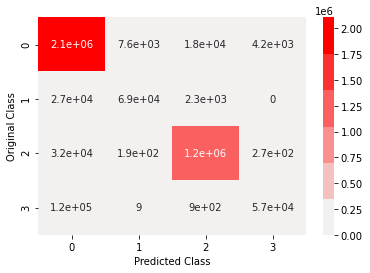

Test data Confusion matrix


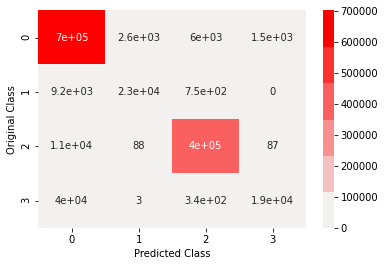

In [16]:
def plot_confusion_matrix(y_true,y_predict):
    X=confusion_matrix(y_true,y_predict)
    labels=[1,2,3,4]    
    sns.heatmap(X,annot=True,cmap=sns.light_palette("red"))
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
print('Train data Confusion matrix')
plot_confusion_matrix(y_train,y_train_pred)
print('Test data Confusion matrix')
plot_confusion_matrix(y_cv,y_cv_pred)

In [15]:
X_test_predict=lgbt_model.predict_proba(X_test)
prediction=pd.DataFrame(X_test_predict,columns=['A','B','C','D']) 
prediction['id']=test_data['id']
prediction=prediction[["id","A","B","C","D"]]
prediction.to_csv('lgbt_submission.csv',index=False)

# Logistic Regression

In [17]:
x_cfl=SGDClassifier(loss='log')
prams={
    'alpha':[1e-05,0.0001,0.001,0.005,0.01,0.1],  
    'penalty':['l1','l2'],  
}
random_cfl=RandomizedSearchCV(x_cfl,param_distributions=prams,verbose=10)
random_cfl.fit(X_train,y_train)
print(random_cfl.best_estimator_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] penalty=l1, alpha=0.1 ...........................................
[CV] ............... penalty=l1, alpha=0.1, score=0.585, total=  27.3s
[CV] penalty=l1, alpha=0.1 ...........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   27.3s remaining:    0.0s


[CV] ............... penalty=l1, alpha=0.1, score=0.585, total=  27.3s
[CV] penalty=l1, alpha=0.1 ...........................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   54.5s remaining:    0.0s


[CV] ............... penalty=l1, alpha=0.1, score=0.585, total=  27.3s
[CV] penalty=l1, alpha=0.1 ...........................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.4min remaining:    0.0s


[CV] ............... penalty=l1, alpha=0.1, score=0.585, total=  26.1s
[CV] penalty=l1, alpha=0.1 ...........................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  1.8min remaining:    0.0s


[CV] ............... penalty=l1, alpha=0.1, score=0.585, total=  27.2s
[CV] penalty=l2, alpha=0.001 .........................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  2.3min remaining:    0.0s


[CV] ............. penalty=l2, alpha=0.001, score=0.607, total=  23.8s
[CV] penalty=l2, alpha=0.001 .........................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  2.6min remaining:    0.0s


[CV] ............. penalty=l2, alpha=0.001, score=0.604, total=  23.4s
[CV] penalty=l2, alpha=0.001 .........................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:  3.0min remaining:    0.0s


[CV] ............. penalty=l2, alpha=0.001, score=0.607, total=  23.5s
[CV] penalty=l2, alpha=0.001 .........................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:  3.4min remaining:    0.0s


[CV] ............. penalty=l2, alpha=0.001, score=0.607, total=  23.7s
[CV] penalty=l2, alpha=0.001 .........................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  3.8min remaining:    0.0s


[CV] ............. penalty=l2, alpha=0.001, score=0.610, total=  23.5s
[CV] penalty=l2, alpha=0.01 ..........................................
[CV] .............. penalty=l2, alpha=0.01, score=0.607, total=  22.0s
[CV] penalty=l2, alpha=0.01 ..........................................
[CV] .............. penalty=l2, alpha=0.01, score=0.607, total=  21.9s
[CV] penalty=l2, alpha=0.01 ..........................................
[CV] .............. penalty=l2, alpha=0.01, score=0.607, total=  22.0s
[CV] penalty=l2, alpha=0.01 ..........................................
[CV] .............. penalty=l2, alpha=0.01, score=0.606, total=  22.2s
[CV] penalty=l2, alpha=0.01 ..........................................
[CV] .............. penalty=l2, alpha=0.01, score=0.607, total=  22.1s
[CV] penalty=l2, alpha=0.0001 ........................................
[CV] ............ penalty=l2, alpha=0.0001, score=0.607, total=  27.2s
[CV] penalty=l2, alpha=0.0001 ........................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 23.8min finished


SGDClassifier(alpha=0.001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)


In [18]:
lr_model=random_cfl.best_estimator_
lr_model.fit(X_train,y_train)
pickle.dump(lr_model, open('logistic_model.sav', 'wb'))

In [19]:
y_train_prob_pred=lr_model.predict_proba(X_train)
y_cv_prob_pred=lr_model.predict_proba(X_cv)
y_train_pred=lr_model.predict(X_train)
y_cv_pred=lr_model.predict(X_cv)

loss_train=log_loss(y_train,y_train_prob_pred)
loss_test=log_loss(y_cv,y_cv_prob_pred)
F1_train_micro=f1_score(y_train,y_train_pred,average='micro')
F1_test_micro=f1_score(y_cv,y_cv_pred,average='micro')
F1_train_macro=f1_score(y_train,y_train_pred,average='macro')
F1_test_macro=f1_score(y_cv,y_cv_pred,average='macro')
print('Training_loss :',loss_train)
print('F1 train micro score :',F1_train_micro)
print('F1 train macro score :',F1_train_macro)
print('Testing_loss :',loss_test)
print('F1 test micro score :',F1_test_micro)
print('F1 train macro score :',F1_test_macro)

Training_loss : 0.9090762202031348
F1 train micro score : 0.6075971801625228
F1 train macro score : 0.22045521432121917
Testing_loss : 0.909227363803314
F1 test micro score : 0.6074884785052628
F1 train macro score : 0.22027517836185642


Train data Confusion matrix


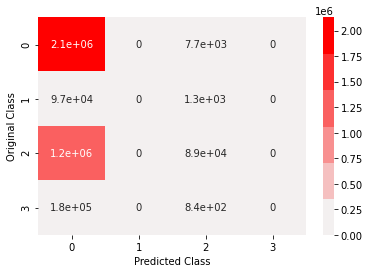

Test data Confusion matrix


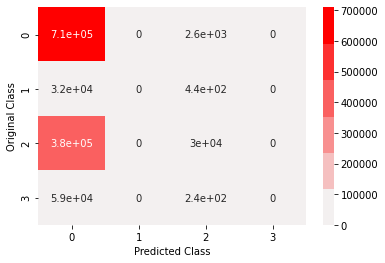

In [20]:
def plot_confusion_matrix(y_true,y_predict):
    X=confusion_matrix(y_true,y_predict)
    labels=[1,2,3,4]    
    sns.heatmap(X,annot=True,cmap=sns.light_palette("red"))
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
print('Train data Confusion matrix')
plot_confusion_matrix(y_train,y_train_pred)
print('Test data Confusion matrix')
plot_confusion_matrix(y_cv,y_cv_pred)

In [21]:
X_test_predict=lr_model.predict_proba(X_test)
prediction=pd.DataFrame(X_test_predict,columns=['A','B','C','D']) 
prediction['id']=test_data['id']
prediction=prediction[["id","A","B","C","D"]]
prediction.to_csv('lr_submission.csv',index=False)

# Random Forest Classifier

In [ ]:
x_cfl=RandomForestClassifier()
prams={
     "n_estimators":[50],
     "max_depth":[10,30,50],
     "min_samples_split":[4,6,8,10,12],
     "min_samples_leaf": [1,2,4,6,8]
}
random_cfl=RandomizedSearchCV(x_cfl,param_distributions=prams,cv=3,verbose=10)
random_cfl.fit(X_train,y_train)
print(random_cfl.best_estimator_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] n_estimators=50, min_samples_split=12, min_samples_leaf=6, max_depth=50 
[CV]  n_estimators=50, min_samples_split=12, min_samples_leaf=6, max_depth=50, score=0.969, total=13.0min
[CV] n_estimators=50, min_samples_split=12, min_samples_leaf=6, max_depth=50 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 13.0min remaining:    0.0s


[CV]  n_estimators=50, min_samples_split=12, min_samples_leaf=6, max_depth=50, score=0.970, total=13.1min
[CV] n_estimators=50, min_samples_split=12, min_samples_leaf=6, max_depth=50 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed: 26.1min remaining:    0.0s


[CV]  n_estimators=50, min_samples_split=12, min_samples_leaf=6, max_depth=50, score=0.970, total=13.0min
[CV] n_estimators=50, min_samples_split=12, min_samples_leaf=6, max_depth=30 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed: 39.1min remaining:    0.0s


[CV]  n_estimators=50, min_samples_split=12, min_samples_leaf=6, max_depth=30, score=0.963, total=12.5min
[CV] n_estimators=50, min_samples_split=12, min_samples_leaf=6, max_depth=30 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed: 51.6min remaining:    0.0s


[CV]  n_estimators=50, min_samples_split=12, min_samples_leaf=6, max_depth=30, score=0.963, total=12.6min
[CV] n_estimators=50, min_samples_split=12, min_samples_leaf=6, max_depth=30 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 64.2min remaining:    0.0s


[CV]  n_estimators=50, min_samples_split=12, min_samples_leaf=6, max_depth=30, score=0.963, total=12.6min
[CV] n_estimators=50, min_samples_split=6, min_samples_leaf=1, max_depth=50 


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed: 76.8min remaining:    0.0s


[CV]  n_estimators=50, min_samples_split=6, min_samples_leaf=1, max_depth=50, score=0.976, total=13.4min
[CV] n_estimators=50, min_samples_split=6, min_samples_leaf=1, max_depth=50 


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed: 90.3min remaining:    0.0s


[CV]  n_estimators=50, min_samples_split=6, min_samples_leaf=1, max_depth=50, score=0.977, total=12.9min
[CV] n_estimators=50, min_samples_split=6, min_samples_leaf=1, max_depth=50 


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed: 103.2min remaining:    0.0s


[CV]  n_estimators=50, min_samples_split=6, min_samples_leaf=1, max_depth=50, score=0.977, total=13.0min
[CV] n_estimators=50, min_samples_split=4, min_samples_leaf=6, max_depth=30 


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed: 116.2min remaining:    0.0s


[CV]  n_estimators=50, min_samples_split=4, min_samples_leaf=6, max_depth=30, score=0.963, total=12.5min
[CV] n_estimators=50, min_samples_split=4, min_samples_leaf=6, max_depth=30 
[CV]  n_estimators=50, min_samples_split=4, min_samples_leaf=6, max_depth=30, score=0.963, total=12.7min
[CV] n_estimators=50, min_samples_split=4, min_samples_leaf=6, max_depth=30 
[CV]  n_estimators=50, min_samples_split=4, min_samples_leaf=6, max_depth=30, score=0.964, total=12.4min
[CV] n_estimators=50, min_samples_split=10, min_samples_leaf=1, max_depth=30 
[CV]  n_estimators=50, min_samples_split=10, min_samples_leaf=1, max_depth=30, score=0.966, total=12.8min
[CV] n_estimators=50, min_samples_split=10, min_samples_leaf=1, max_depth=30 
[CV]  n_estimators=50, min_samples_split=10, min_samples_leaf=1, max_depth=30, score=0.966, total=12.7min
[CV] n_estimators=50, min_samples_split=10, min_samples_leaf=1, max_depth=30 
[CV]  n_estimators=50, min_samples_split=10, min_samples_leaf=1, max_depth=30, score=

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed: 369.9min finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=50, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [ ]:
import pickle
rf_model=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=50, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
rf_model.fit(X_train,y_train)
pickle.dump(rf_model, open('random_forest.sav', 'wb'))

In [ ]:
from sklearn.metrics import log_loss
from sklearn.metrics import f1_score
y_train_prob_pred=rf_model.predict_proba(X_train)
y_cv_prob_pred=rf_model.predict_proba(X_cv)
y_train_pred=rf_model.predict(X_train)
y_cv_pred=rf_model.predict(X_cv)

loss_train=log_loss(y_train,y_train_prob_pred)
loss_test=log_loss(y_cv,y_cv_prob_pred)
F1_train_micro=f1_score(y_train,y_train_pred,average='micro')
F1_test_micro=f1_score(y_cv,y_cv_pred,average='micro')
F1_train_macro=f1_score(y_train,y_train_pred,average='macro')
F1_test_macro=f1_score(y_cv,y_cv_pred,average='macro')
print('Training_loss :',loss_train)
print('F1 train micro score :',F1_train_micro)
print('F1 train macro score :',F1_train_macro)
print('Testing_loss :',loss_test)
print('F1 test micro score :',F1_test_micro)
print('F1 train macro score :',F1_test_macro)

Training_loss : 0.027421430271854615
F1 train micro score : 0.9997918130481173
F1 train macro score : 0.9994167609063315
Testing_loss : 0.07211414439339871
F1 test micro score : 0.9814333002425923
F1 train macro score : 0.9485086197165244


Train data Confusion matrix


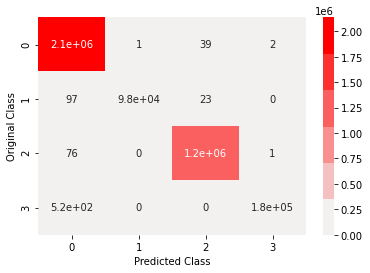

Test data Confusion matrix


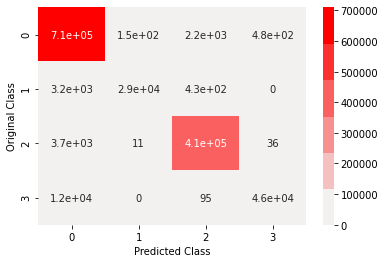

In [ ]:
def plot_confusion_matrix(y_true,y_predict):
    X=confusion_matrix(y_true,y_predict)
    labels=[1,2,3,4]    
    sns.heatmap(X,annot=True,cmap=sns.light_palette("red"))
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
print('Train data Confusion matrix')
plot_confusion_matrix(y_train,y_train_pred)
print('Test data Confusion matrix')
plot_confusion_matrix(y_cv,y_cv_pred)

In [ ]:
X_test_predict=rf_model.predict_proba(X_test)
prediction=pd.DataFrame(X_test_predict,columns=['A','B','C','D']) 
prediction['id']=test_data['id']
prediction=prediction[["id","A","B","C","D"]]
prediction.to_csv('rf_submission.csv',index=False)

# MLP

In [ ]:
y_train=pd.get_dummies(y_train).values
y_cv=pd.get_dummies(y_cv).values

In [ ]:
input_x =Input(shape=(12,1))

conv_1=Conv1D(64,3, activation='relu')(input_x)
max_pool_1=MaxPool1D(pool_size=2,padding='same')(conv_1)

conv_1=Conv1D(32,3, activation='relu')(max_pool_1)
max_pool_1=MaxPool1D(pool_size=2,padding='same')(conv_1)

flattern_layer=Flatten(data_format='channels_last',name='Flatten')(max_pool_1)

Dense1 = Dense(units=64,activation='relu',kernel_initializer=tf.keras.initializers.HeUniform(seed=33))(flattern_layer)
Dropout_1=Dropout(0.3)(Dense1)

Dense1 = Dense(units=32,activation='relu',kernel_initializer=tf.keras.initializers.HeUniform(seed=33))(Dropout_1)
Dropout_1=Dropout(0.3)(Dense1)

Out = Dense(units=4,activation='softmax',kernel_initializer=tf.keras.initializers.HeUniform(seed=3),name='Output')(Dropout_1)
model = Model(inputs=input_x, outputs=Out)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 12, 1)]           0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 10, 64)            256       
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 5, 64)             0         
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 3, 32)             6176      
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, 2, 32)             0         
_________________________________________________________________
Flatten (Flatten)            (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160  

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='Adam',
          metrics=[tfa.metrics.F1Score(num_classes=4,name='f1_score_micro',average='micro'),tfa.metrics.F1Score(num_classes=4,name='f1_score_macro',average='macro')])
history=model.fit(X_train,y_train,epochs=20,batch_size=10000,validation_data=(X_cv,y_cv))


Epoch 1/20
366/366 [==============================] - 38s 18ms/step - loss: 0.9809 - f1_score_micro: 0.5708 - f1_score_macro: 0.2739 - val_loss: 0.5390 - val_f1_score_micro: 0.8137 - val_f1_score_macro: 0.4211
Epoch 2/20
366/366 [==============================] - 6s 17ms/step - loss: 0.5404 - f1_score_micro: 0.8224 - f1_score_macro: 0.4253 - val_loss: 0.4331 - val_f1_score_micro: 0.8545 - val_f1_score_macro: 0.4443
Epoch 3/20
366/366 [==============================] - 6s 17ms/step - loss: 0.4460 - f1_score_micro: 0.8561 - f1_score_macro: 0.4452 - val_loss: 0.3992 - val_f1_score_micro: 0.8648 - val_f1_score_macro: 0.4500
Epoch 4/20
366/366 [==============================] - 6s 17ms/step - loss: 0.4048 - f1_score_micro: 0.8676 - f1_score_macro: 0.4526 - val_loss: 0.3614 - val_f1_score_micro: 0.8759 - val_f1_score_macro: 0.4567
Epoch 5/20
366/366 [==============================] - 6s 17ms/step - loss: 0.3809 - f1_score_micro: 0.8734 - f1_score_macro: 0.4564 - val_loss: 0.3509 - val_f1_sco

In [ ]:
X_test_predict=model.predict(X_test)
prediction=pd.DataFrame(X_test_predict,columns=['A','B','C','D']) 
prediction['id']=test_data['id']
prediction=prediction[["id","A","B","C","D"]]
prediction.to_csv('mlp_submission.csv',index=False)
prediction.head(1)

,id,A,B,C,D
0,0,0.861164,0.138836,5.424082e-10,4.357612e-38


In [ ]:
model.save('model.h5')
from google.colab import files
files.download('mlp_submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

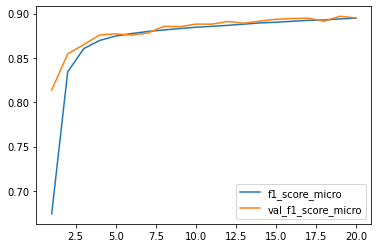

In [ ]:
epochs=[]
for i in range(20):
    epochs.append(i+1)
import matplotlib.pyplot as plt
plt.plot(epochs,history.history['f1_score_micro'],label='f1_score_micro')
plt.plot(epochs,history.history['val_f1_score_micro'],label='val_f1_score_micro')

plt.plot()
plt.legend()
plt.show()

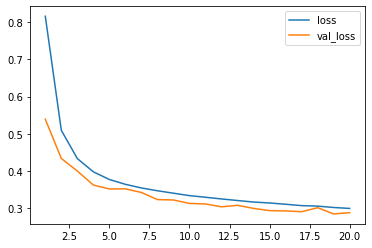

In [ ]:
plt.plot(epochs,history.history['loss'],label='loss')
plt.plot(epochs,history.history['val_loss'],label='val_loss')

plt.plot()
plt.legend()
plt.show()

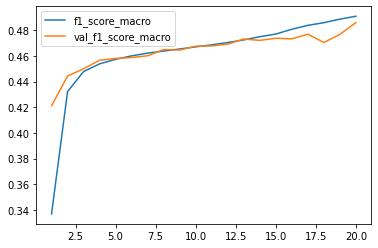

In [ ]:
plt.plot(epochs,history.history['f1_score_macro'],label='f1_score_macro')
plt.plot(epochs,history.history['val_f1_score_macro'],label='val_f1_score_macro')

plt.plot()
plt.legend()
plt.show()

# Model Summary

            1.Logistic regression 
                          Training loss  -0.9095278974268775
                          Testing loss   -0.9096949653798138
            2.LGBT classification
                          Training loss  -0.1662291449525615
                          Testing loss   -0.16903759494353826
            3.Random Forest Classification
                          Training loss  -0.027421430271854615
                          Testing Loss   -0.07211414439339871
            4.Multi layer perception -
                          Training loss  -0.2995
                          Testing Loss   -0.2868

# KAGGLE SCORE




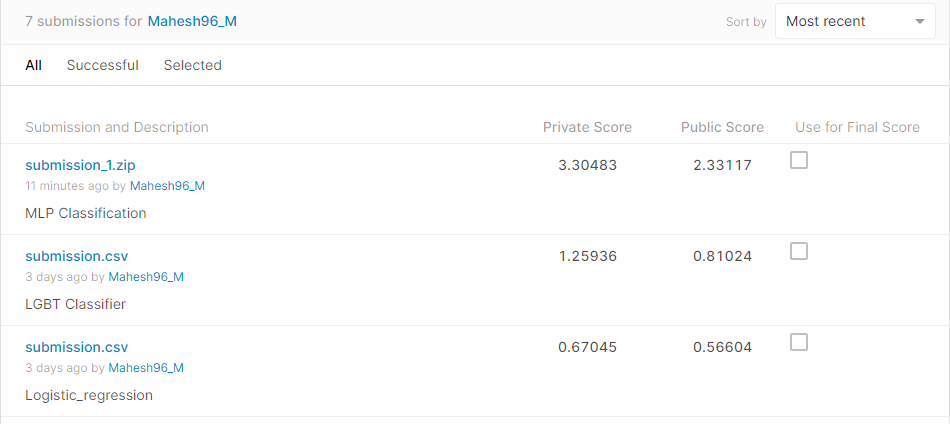
!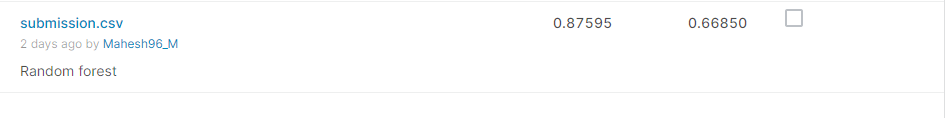